# Урок 2. Регрессия на практике

Пусть у нас имеется некоторый набор данных sales.csv о продажах квартир.     
— цена продажи (SalePrice, зависимая переменная),     
— наземная жилая зона (GrLivArea),         
— общее качество (Overall Quality),       
— территория гаража (GarageArea),         
— условия сделки (SaleCondition).          
Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.

Для реализации модели линейной регрессии на данных из файла sales.csv, необходимо выполнить следующие шаги:

1. Загрузить данные.
2. Провести предварительную обработку данных.
3. Разделить данные на обучающую и тестовую выборки.
5. Построить модель линейной регрессии.
6. Оценить качество модели с помощью MAE и MSE.

In [3]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
# Загрузка данных
data = pd.read_csv('sales.csv')

# Просмотр первых строк данных
print(data.head())

   SalePrice  GrLivArea  GarageArea  OverallQual Street SaleCondition
0     208500       1710         548            7   Pave        Normal
1     181500       1262         460            6   Pave        Normal
2     223500       1786         608            7   Pave        Normal
3     140000       1717         642            7   Pave       Abnorml
4     250000       2198         836            8   Pave        Normal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


Пропуски в датафрейме отсутствуют.

In [16]:
# Выбор признаков и целевой переменной
X = data[['GrLivArea', 'OverallQual', 'GarageArea']]
y = data['SalePrice']

# Разделение данных на обучающую и тестовую выборки с использованием train_test_split(). 
# В данном случае 20% данных используется для тестирования, а 80% — для обучения.
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающей выборке
model.fit(train[['GrLivArea', 'OverallQual', 'GarageArea']], train['SalePrice'])

# Результаты предсказаний на обучающей и тестовой выборках
y_predict_train = model.predict(train[['GrLivArea', 'OverallQual', 'GarageArea']])
y_predict_test = model.predict(test[['GrLivArea', 'OverallQual', 'GarageArea']])



In [17]:
# Обучающая выборка
train_mae = mean_absolute_error(train['SalePrice'], y_predict_train)
train_mse = mean_squared_error(train['SalePrice'], y_predict_train)
print("MAE на обучающей выборке:", train_mae)
print("MSE на обучающей выборке:", train_mse)


MAE на обучающей выборке: 26695.56507243098
MSE на обучающей выборке: 1606217852.3585093


In [19]:
# Оценка качества модели на тестовой выборке
mae = mean_absolute_error(test['SalePrice'], y_predict_test)
mse = mean_squared_error(test['SalePrice'], y_predict_test)

# Вывод результатов
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Среднеквадратичная ошибка (MSE): {mse}")

Средняя абсолютная ошибка (MAE): 27163.18800043048
Среднеквадратичная ошибка (MSE): 1813348452.9460096


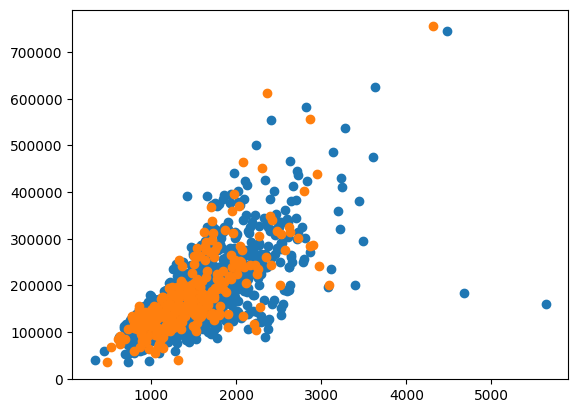

In [20]:
plt.scatter(train['GrLivArea'], train['SalePrice'], label='Обучающая выборка')
plt.scatter(test['GrLivArea'], test['SalePrice'], label='Тестовая выборка')

## Заключение
После выполнения кода, получпем значения MAE и MSE, которые позволят оценить точность модели линейной регрессии. Чем меньше значения этих метрик, тем лучше модель предсказывает цены на квартиры.